# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 



In [5]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [6]:
df.shape

(306, 4)

In [7]:
df.columns

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')

#### Observation 
The 4 features  are :
> - age : Age of patient at time of operation (numerical)
> - operation_Year : Patient's year of operation (year - 1900,numerical)
> - axil_nodes : Number of positive axillary nodes detected (numerical)
> - survival_status : 
      > 1 represents the patient survived 5 years or longer,  
      > 2 represents the patient died within 5 year

In [8]:
df.dtypes

age                int64
operation_Year     int64
axil_nodes         int64
survival_status    int64
dtype: object

### Observation
> - The dataset has 306 data points and 4 features
> - All the features are of int data type

In [9]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Observation
> - 1 represents the patient survived 5 years or longer,
2 represents the patient died within 5 year
> - There is a significant difference between patients who survived more than 5 years i.e.,225 and patients who died within 5 years i.e., 81
> - This indicates an imbalanced dataset points

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

> - We want to classify the survival status of a patient based on their medical history like the age of operation, year of operation, Number of positive axillary nodes detected 
> - Based on these features we classify the survival status as 1 or 2
where 1 indicates the patient survived 5 years or longer and 2 indicates the patient died within 5 year

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Histogram and PDF of features

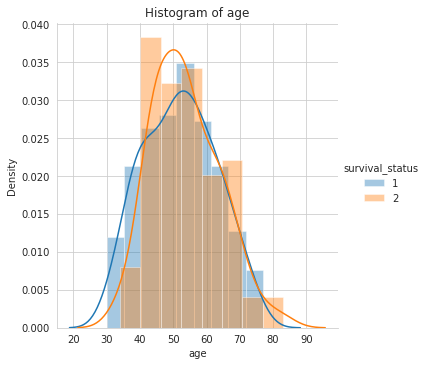

In [11]:
# Histogram of age
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status',size=5).map(sns.distplot,"age").add_legend()
plt.title("Histogram of age")
plt.show()

Observation - if the age<30 the survival chance is good , for age>30 the survival chance cannot be explained clearly

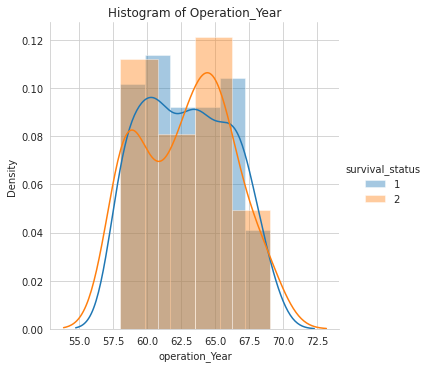

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status',size=5).map(sns.distplot,"operation_Year").add_legend()
plt.title("Histogram of Operation_Year")
plt.show()

Observation - survival_status is overlapping with each other in operation_year, no significant observation

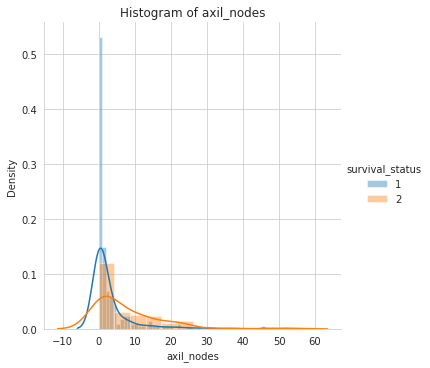

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status',size=5).map(sns.distplot,"axil_nodes").add_legend()
plt.title("Histogram of axil_nodes")
plt.show()

Observation - The Survival chance of patients is very high if the number of axil_nodes is betweeen 0-5 i.e.,if the number of axil_nodes are less the survival chance is more

## CDF of features

In [12]:
# Dataframe for each type/class
df_survival_status_1 = df.loc[df['survival_status']==1]
df_survival_status_2 = df.loc[df['survival_status']==2]


In [13]:
import numpy as np

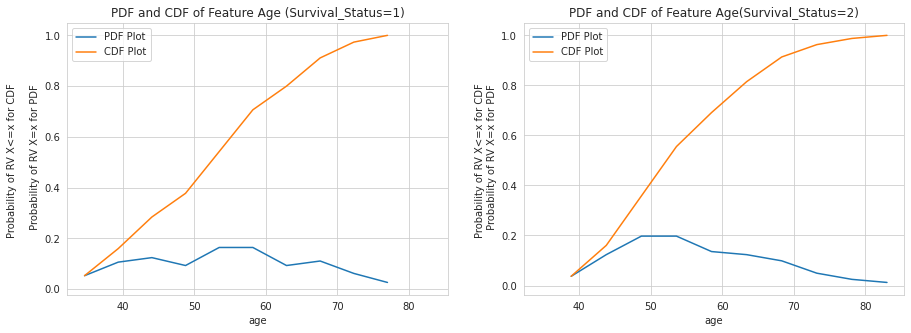

In [35]:
# age of patients whose survival staus =1
counts, bin_edges = np.histogram(df_survival_status_1['age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
axes[0].plot(bin_edges[1:],pdf)
axes[0].plot(bin_edges[1:],cdf)

axes[0].set_title('PDF and CDF of Feature Age (Survival_Status=1)')
axes[0].set_xlabel('age')
axes[0].set_ylabel('Probability of RV X<=x for CDF \n\n Probability of RV X=x for PDF')
axes[0].legend(labels=["PDF Plot","CDF Plot"])

# age of patients whose survival staus =2
counts, bin_edges = np.histogram(df_survival_status_2['age'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
axes[1].plot(bin_edges[1:],pdf)
axes[1].plot(bin_edges[1:],cdf)

axes[1].set_xlabel('age')
axes[1].set_ylabel('Probability of RV X<=x for CDF \n Probability of RV X=x for PDF')
axes[1].set_title('PDF and CDF of Feature Age(Survival_Status=2)')
axes[1].legend(labels=["PDF Plot","CDF Plot"])


Observation - age has no effect on survival chance of a patient

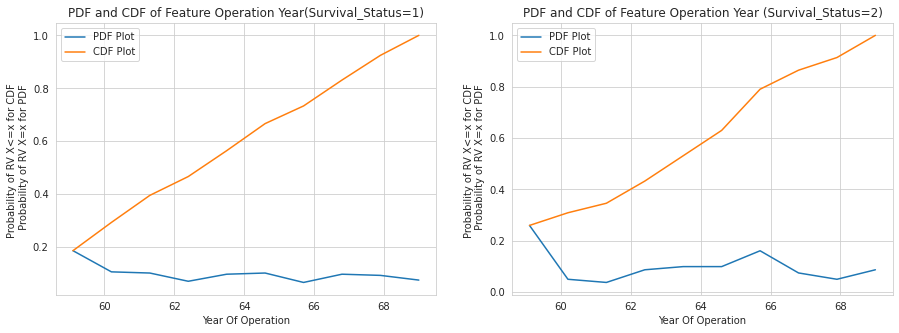

In [34]:
# Operation year of patients  whose survival staus =1
counts, bin_edges = np.histogram(df_survival_status_1['operation_Year'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
axes[0].plot(bin_edges[1:],pdf)
axes[0].plot(bin_edges[1:],cdf)

axes[0].set_title('PDF and CDF of Feature Operation Year(Survival_Status=1)')
axes[0].set_xlabel('Year Of Operation')
axes[0].set_ylabel('Probability of RV X<=x for CDF \n Probability of RV X=x for PDF')
axes[0].legend(labels=["PDF Plot","CDF Plot"])


# Operation year of patients whose survival staus =2
counts, bin_edges = np.histogram(df_survival_status_2['operation_Year'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

axes[1].plot(bin_edges[1:],pdf)
axes[1].plot(bin_edges[1:],cdf)

axes[1].set_title('PDF and CDF of Feature Operation Year (Survival_Status=2)')
axes[1].set_xlabel('Year Of Operation')
axes[1].set_ylabel('Probability of RV X<=x for CDF \n Probability of RV X=x for PDF')
axes[1].legend(labels=["PDF Plot","CDF Plot"])

Observation - Operation year has no effect on survival chance

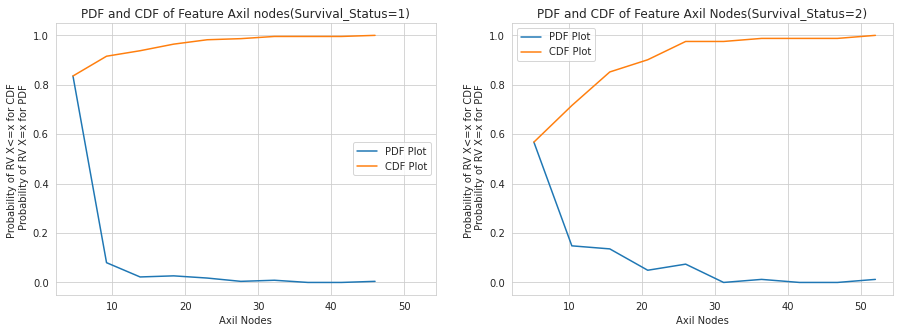

In [36]:
#axil nodes of patients whose survival staus =1
counts, bin_edges = np.histogram(df_survival_status_1['axil_nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
axes[0].plot(bin_edges[1:],pdf)
axes[0].plot(bin_edges[1:],cdf)

axes[0].set_title('PDF and CDF of Feature Axil nodes(Survival_Status=1)')
axes[0].set_xlabel('Axil Nodes')
axes[0].set_ylabel('Probability of RV X<=x for CDF \n Probability of RV X=x for PDF')
axes[0].legend(labels=["PDF Plot","CDF Plot"])

# axil nodes of patients whose survival staus =2
counts, bin_edges = np.histogram(df_survival_status_2['axil_nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

axes[1].plot(bin_edges[1:],pdf)
axes[1].plot(bin_edges[1:],cdf)

axes[1].set_title('PDF and CDF of Feature Axil Nodes(Survival_Status=2)')
axes[1].set_xlabel('Axil Nodes')
axes[1].set_ylabel('Probability of RV X<=x for CDF \n Probability of RV X=x for PDF')
axes[1].legend(labels=["PDF Plot","CDF Plot"])

Observation - if axil_nodes is less than 10, the survival chance is high

## Box plot

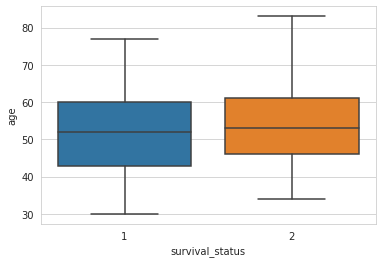

In [37]:
sns.boxplot(x='survival_status',y='age',data=df)
plt.show()

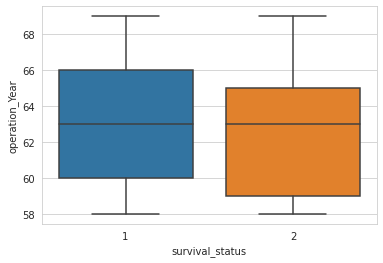

In [38]:
sns.boxplot(x='survival_status',y='operation_Year',data=df)
plt.show()

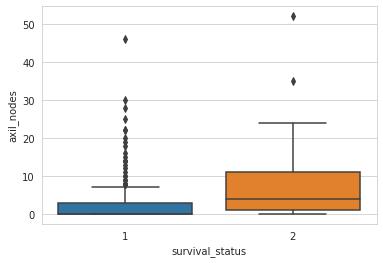

In [39]:
sns.boxplot(x='survival_status',y='axil_nodes',data=df)
plt.show()

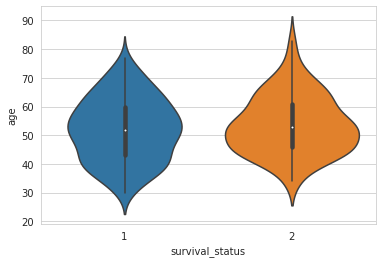

In [40]:
sns.violinplot(x="survival_status", y="age", data=df, size=8)
plt.show()

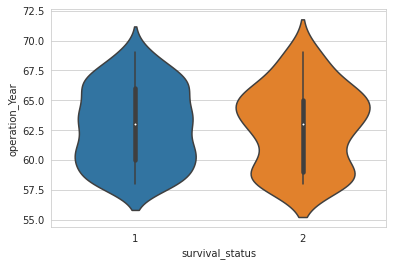

In [41]:
sns.violinplot(x="survival_status", y="operation_Year", data=df, size=8)
plt.show()

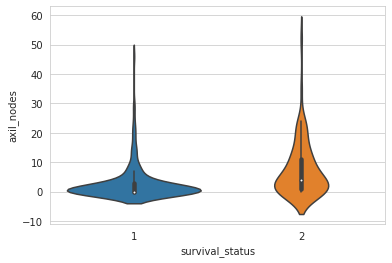

In [42]:
sns.violinplot(x="survival_status", y="axil_nodes", data=df, size=8)
plt.show()

####Observation 
> - if axil_nodes are close to zero, the probability of survival is high

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


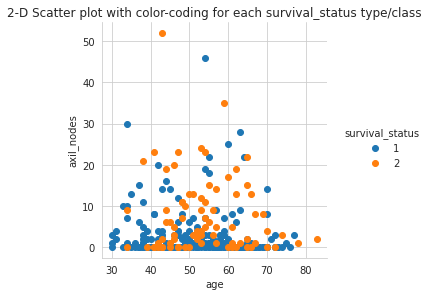

In [43]:
# scatter plot of age , axil_nodes
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4).map(plt.scatter, "age", "axil_nodes").add_legend();
plt.title('2-D Scatter plot with color-coding for each survival_status type/class')
plt.show();

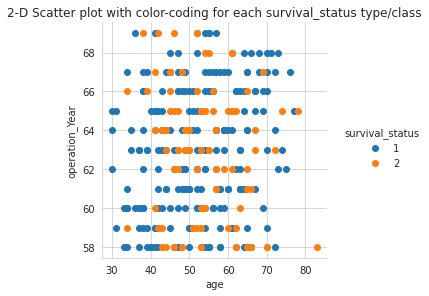

In [ ]:
# scatter plot of age , operation_Year
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4).map(plt.scatter, "age", "operation_Year").add_legend();
plt.title('2-D Scatter plot with color-coding for each survival_status type/class')
plt.show();

#### Observation 
> - between age of 30-40 ,through out all the operation_Year ,the survival chance is good

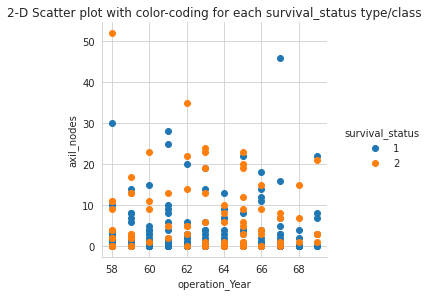

In [ ]:
# scatter plot of operation_Year, axil_nodes
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4).map(plt.scatter, "operation_Year", "axil_nodes").add_legend();
plt.title('2-D Scatter plot with color-coding for each survival_status type/class')
plt.show();

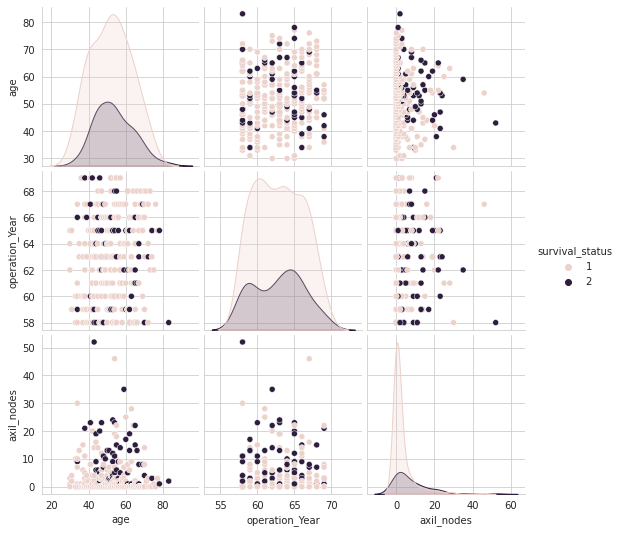

In [ ]:
sns.pairplot(df,hue='survival_status',kind="scatter")
plt.show()

#### Observation
> - for age between 20-40 ,if number of axil_nodes are less, the survival status is 1

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

### Observations/Conclusion
- > The key feature that helped in classifying the survival_status is axil_nodes
- > if axil_nodes are close to zero, the probability of survival is high
- > for age between 20-40 ,if number of axil_nodes are less, the survival 
status is 1
- > There is a significant difference between patients who survived more than 5 years i.e.,225 and patients who died within 5 years i.e., 81
This indicates an imbalanced dataset points

